# IMPORTS

In [1]:
# importing all the imports needed for this phase
# data manipulation
import pandas as pd
import numpy as np

# visuals
import matplotlib.pyplot as plt
import seaborn as sns

# personal import
import created_functions as cf
import env

#stats import
from scipy import stats

# ML stuff:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, \
export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# ACQUIRE

In [2]:
# getting data from SQL
df =cf.get_telco_data()

this file exists, reading csv


In [3]:
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [4]:
df.shape

(7043, 24)

>there are 7043 rows and 24 columns

important
> gender
> tenure
> senior
> monthly

unimportant
> payment_type_id
> internet_service_type
> contract_type_id
> customer_id ( theres already an index)  

# PREPARE

In [5]:
df = cf.prep_telco(df)

In [6]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,streaming_tv,streaming_movies,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,has_add_ons
Unnamed: 0,,,,,,,,,,,,,,,,
0,Female,0,Yes,Yes,9,Yes,No,Yes,No,65.6,593.30,No,One year,DSL,Mailed check,1
1,Male,0,No,No,9,Yes,Yes,No,Yes,59.9,542.40,No,Month-to-month,DSL,Mailed check,0
2,Male,0,No,No,4,Yes,No,No,No,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,1
3,Male,1,Yes,No,13,Yes,No,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,1
4,Female,1,Yes,No,3,Yes,No,Yes,No,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1


### changes to data
>this  function takes in the telco database and cleans it
>turns total charges into a float
>combined 'online_security', 'online_backup', 'device_protection', 'tech_support' into 1 column called add ons
#### deletes
>payment type id
>internet service id
>contract type id
>customer id


# PREPROCESS

In [7]:
encoded_df = cf.preprocess_data(df)

#### function description
>Preprocesses the data by encoding various features into binary format and removing the original columns.
#### changes
>Internet Service Encoding
>Binary Conversion for Specific Services
>Contract Type Encoding
>Automatic Payment Encoding
>Yes/No Features Conversion
>Gender Encoding
>Churn Encoding
>Dropping Original Columns

In [8]:
# creating 2 variables and printing columns with function
cat_var, cont_var = cf.categorize_columns(encoded_df)

'senior_citizen': [0 1]
'partner': [1 0]
'dependents': [1 0]
'tenure': [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
'phone_service': [1 0]
'multiple_lines': [0 1]
'streaming_tv': [1 0]
'streaming_movies': [0 1]
'monthly_charges': [65.6  59.9  73.9  ... 91.75 68.8  67.85]
'total_charges': [ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]
'churn': [0 1]
'has_add_ons': [1 0]
'has_internet': [1]
'monthly_contract': [0 1]
'automatic_payment': [0 1]
'is_male': [0 1]


### data splitting

In [9]:
# splitting the data
train, validate, test = cf.splitting_data(encoded_df, 'churn')

In [10]:
# checking out new variable
train.shape, validate.shape, test.shape

((4219, 16), (1406, 16), (1407, 16))

# EXPLORE


senior_citizen
senior_citizen
0    5890
1    1142
Name: count, dtype: int64
senior_citizen
0    0.8376
1    0.1624
Name: proportion, dtype: float64


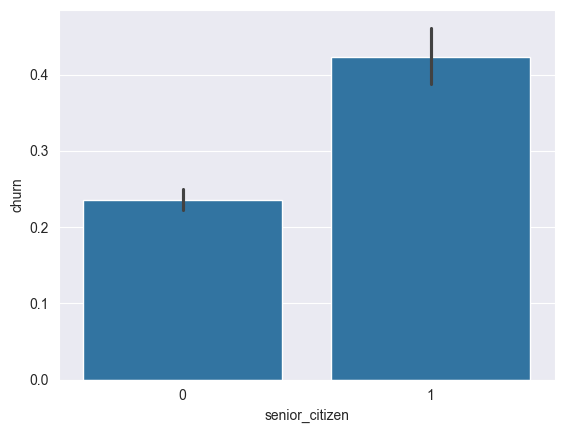


partner
partner
0    3639
1    3393
Name: count, dtype: int64
partner
0    0.517491
1    0.482509
Name: proportion, dtype: float64


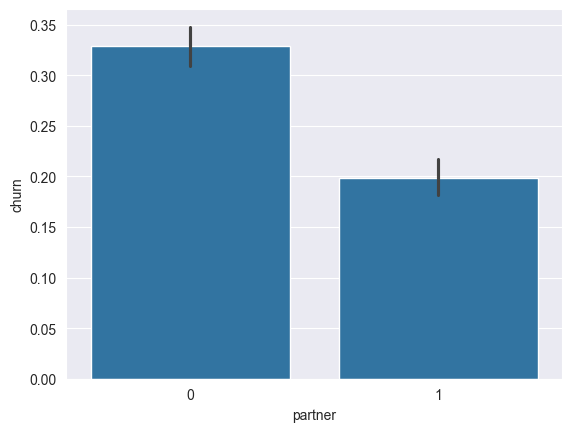


dependents
dependents
0    4933
1    2099
Name: count, dtype: int64
dependents
0    0.701507
1    0.298493
Name: proportion, dtype: float64


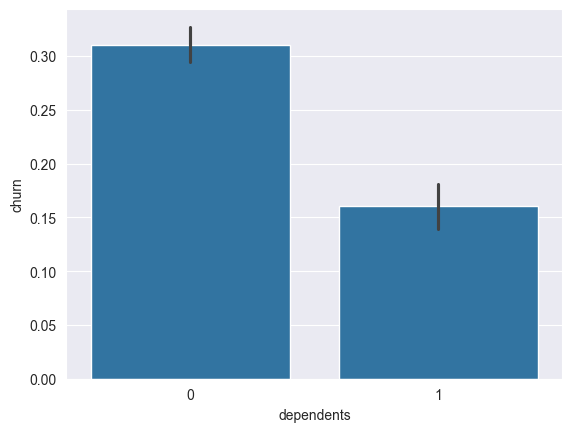


phone_service
phone_service
1    6352
0     680
Name: count, dtype: int64
phone_service
1    0.903299
0    0.096701
Name: proportion, dtype: float64


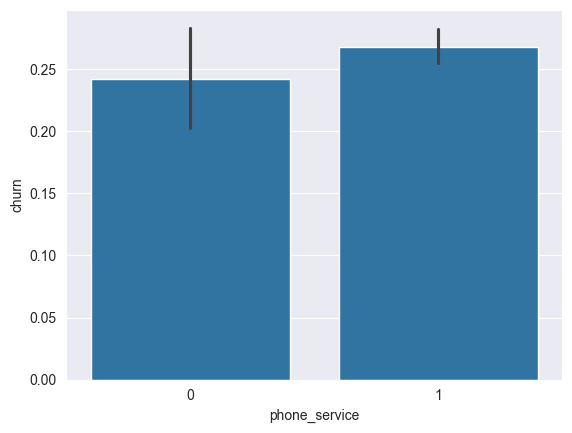


multiple_lines
multiple_lines
0    4065
1    2967
Name: count, dtype: int64
multiple_lines
0    0.578072
1    0.421928
Name: proportion, dtype: float64


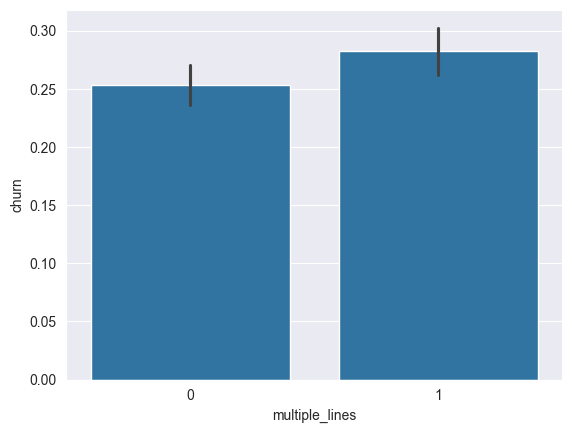


streaming_tv
streaming_tv
0    4329
1    2703
Name: count, dtype: int64
streaming_tv
0    0.615614
1    0.384386
Name: proportion, dtype: float64


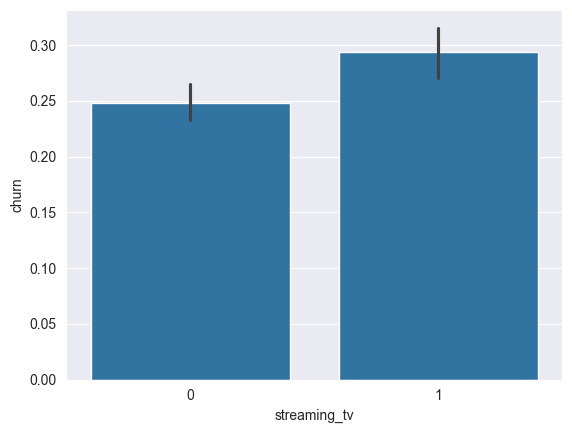


streaming_movies
streaming_movies
0    4301
1    2731
Name: count, dtype: int64
streaming_movies
0    0.611633
1    0.388367
Name: proportion, dtype: float64


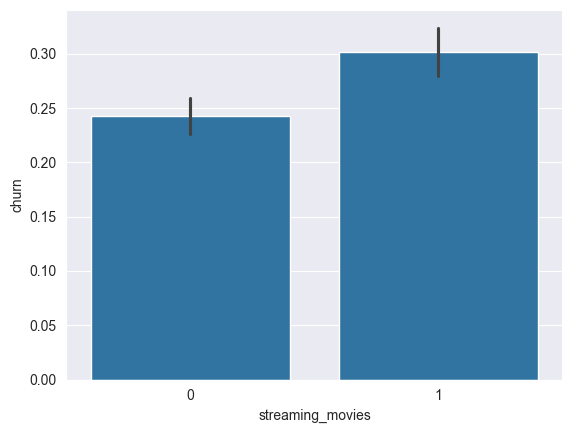


churn
churn
0    5163
1    1869
Name: count, dtype: int64
churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


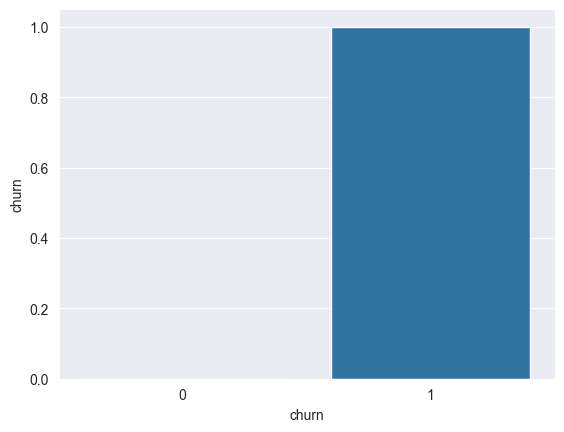


has_add_ons
has_add_ons
1    4245
0    2787
Name: count, dtype: int64
has_add_ons
1    0.603669
0    0.396331
Name: proportion, dtype: float64


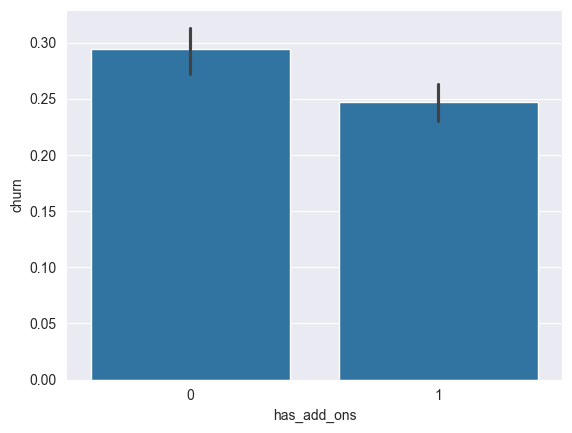


monthly_contract
monthly_contract
1    3875
0    3157
Name: count, dtype: int64
monthly_contract
1    0.551052
0    0.448948
Name: proportion, dtype: float64


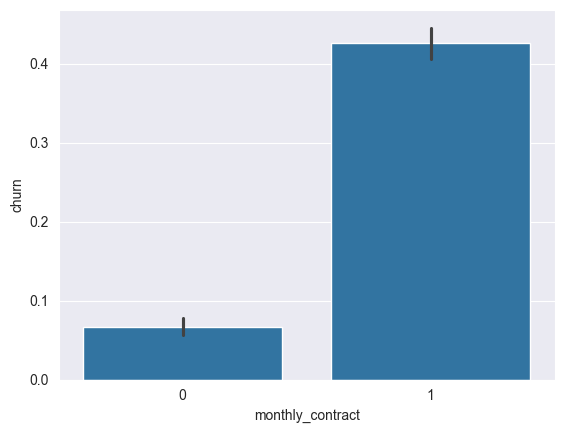


automatic_payment
automatic_payment
0    3969
1    3063
Name: count, dtype: int64
automatic_payment
0    0.56442
1    0.43558
Name: proportion, dtype: float64


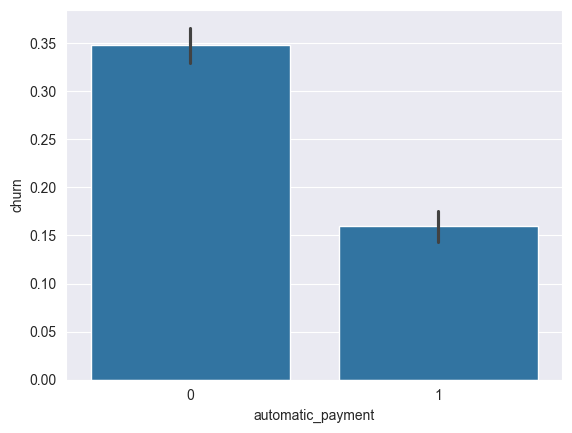


is_male
is_male
1    3549
0    3483
Name: count, dtype: int64
is_male
1    0.504693
0    0.495307
Name: proportion, dtype: float64


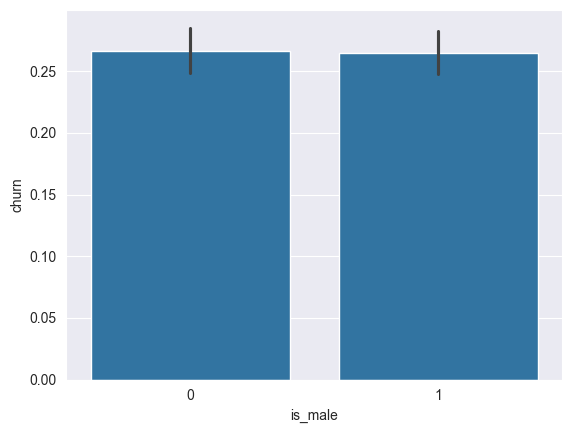

In [11]:
# graph for the catagorical variables
for col in cat_var:
    print(col)
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True))
    sns.barplot(data=train, y='churn', x=col)
    plt.show()
    print()

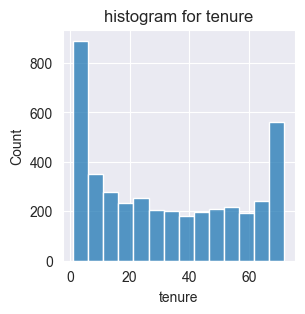

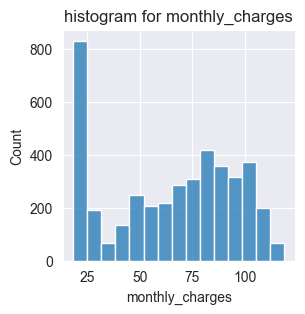

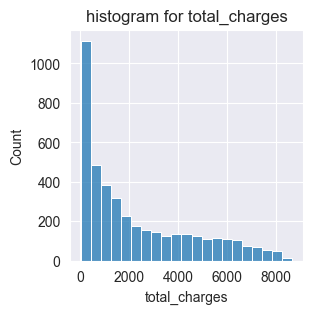

In [12]:
# histogram for cont variables
for x in cont_var:
    plt.figure(figsize= (3, 3))
    sns.histplot(train, x=x)
    plt.title(f'histogram for {x}')

## HYPOTHESIS

### Does the customer column “senior_citizen” affect whether or not someone churn?

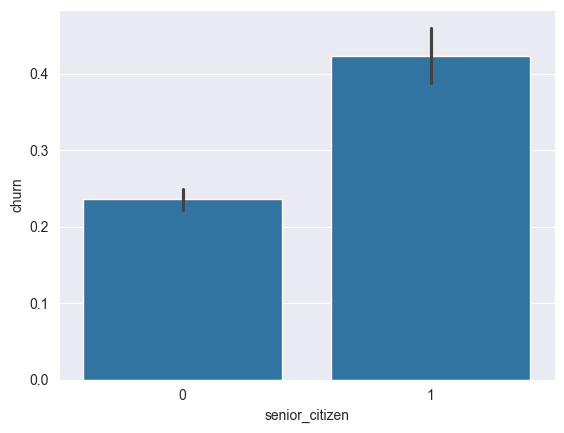

Crosstab between senior_citizen and churn:
churn              0    1
senior_citizen           
0               2708  835
1                390  286

H0: There is NO relationship between senior_citizen and churn
Ha: There IS a relationship between senior_citizen and churn

Reject the null hypothesis. My p-value is 8.206605132251275e-24, which is less than alpha 0.05.
We can conclude that there is a relationship between senior_citizen and churn.


In [13]:
cf.categorical_relationship(train, 'senior_citizen', 'churn')

### Does the customer column "automatic_payment" affect whether or not someone churn?

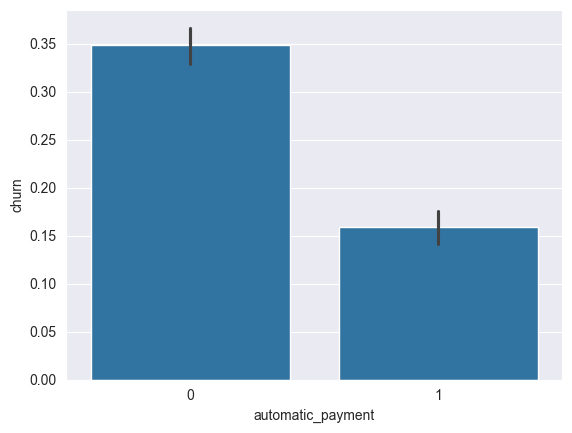

Crosstab between automatic_payment and churn:
churn                 0    1
automatic_payment           
0                  1543  826
1                  1555  295

H0: There is NO relationship between automatic_payment and churn
Ha: There IS a relationship between automatic_payment and churn

Reject the null hypothesis. My p-value is 3.802293916720818e-43, which is less than alpha 0.05.
We can conclude that there is a relationship between automatic_payment and churn.


In [14]:
cf.categorical_relationship(train, 'automatic_payment','churn')

### Does the customer column “monthly_payment” affect whether or not someone churn?

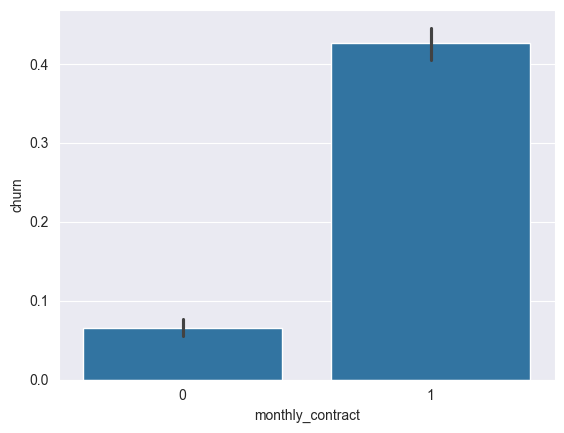

Crosstab between monthly_contract and churn:
churn                0    1
monthly_contract           
0                 1755  124
1                 1343  997

H0: There is NO relationship between monthly_contract and churn
Ha: There IS a relationship between monthly_contract and churn

Reject the null hypothesis. My p-value is 3.1344622282037087e-152, which is less than alpha 0.05.
We can conclude that there is a relationship between monthly_contract and churn.


In [15]:
cf.categorical_relationship(train, 'monthly_contract', 'churn')

My p-value is less than alpha, therefore, we reject the null hypothesis.
we can conclude that there is a relationship between monthly_contract and churn.

## CONCLUSION

We saw there was a relationship between passenger senior_citizen, monthly_contract, automatic)payment and whether or not they churned.

here are some ideas to possibly lower the churn rate. 

Senior Citizens:
>Tailored Communication: Customize communication and support for senior citizens. This could include clearer, larger print on bills and correspondence, or a dedicated support line.
    
Monthly Contracts:
>Incentivize Longer Contracts: Offer incentives for customers to switch from monthly to longer-term contracts, such as annual plans. These could be discounts, additional features, or loyalty rewards.
    
Automatic Payment Methods:
>Promote Automatic Payments: Encourage customers to use automatic payment methods by offering discounts or additional benefits. Make sure the process of setting up automatic payments is simple and secure.